Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

Mobile Games AB Testing with Cookie Cats

In [23]:
import scipy.stats 
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.stats import proportion
from scipy.stats import lognorm
from scipy.stats import norm, t, kstest, shapiro
import statsmodels.api as sm
from matplotlib import pyplot as plt


import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [3]:
df=pd.read_csv('Result_А_B _cookie_cats _2.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [4]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [6]:
df_new=df.astype({'userid':np.uint32,'sum_gamerounds':np.uint32,'retention_1':np.uint8,'retention_7':np.uint8})
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  uint32
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  uint32
 3   retention_1     90189 non-null  uint8 
 4   retention_7     90189 non-null  uint8 
dtypes: object(1), uint32(2), uint8(2)
memory usage: 1.5+ MB


In [7]:
df_new.version.value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

In [8]:
df_new=df_new.drop_duplicates()

In [9]:
df_new.version.value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

In [10]:
df_new['userid'].value_counts().max()

1

In [11]:
n1, n2 = df_new.version.value_counts()
n1, n2

(45489, 44700)

In [12]:
k1_1, k2_1 = df_new.query('retention_1 == 1').version.value_counts()
k1_1,k2_1

(20119, 20034)

In [13]:
k1_7, k2_7 = df_new.query('retention_7 == 1').version.value_counts()
k1_7,k2_7

(8502, 8279)

In [14]:
stats_1=proportion.proportions_chisquare(np.array([k1_1, k2_1]), np.array([n1, n2]))
stats_1[1]

0.07440965529692188

Статистических различий для двух групп по метрике-удержание на семь дней, не наблюдается.

In [15]:
proportion.proportions_ztest(np.array([k1_1, k2_1]), np.array([n1, n2]))

(-1.7840862247974725, 0.07440965529691913)

In [16]:
proportion.proportions_ztest(np.array([k1_7, k2_7]), np.array([n1, n2]))

(0.6519862722187609, 0.5144100282874542)

После оценки по Z критерию результаты остались те же.

In [17]:
df_new.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [18]:
a=df_new.query('version=="gate_30" ').sum_gamerounds
b=df_new.query('version=="gate_40" ').sum_gamerounds

In [19]:
df_new.query('version=="gate_30"').describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.470000e+04,44700.000000,44700.000000,44700.000000
mean,4.987564e+06,52.456264,0.448188,0.190201
std,2.881026e+06,256.716423,0.497314,0.392464
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.505469e+06,5.000000,0.000000,0.000000
50%,4.983631e+06,17.000000,0.000000,0.000000
75%,7.481497e+06,50.000000,1.000000,0.000000
max,9.999710e+06,49854.000000,1.000000,1.000000


In [20]:
df_new.query('version=="gate_40"').describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.548900e+04,45489.000000,45489.000000,45489.000000
mean,5.009073e+06,51.298776,0.442283,0.182000
std,2.885496e+06,103.294416,0.496663,0.385849
min,3.770000e+02,0.000000,0.000000,0.000000
25%,2.517171e+06,5.000000,0.000000,0.000000
50%,5.007329e+06,16.000000,0.000000,0.000000
75%,7.510762e+06,52.000000,1.000000,0.000000
max,9.999861e+06,2640.000000,1.000000,1.000000


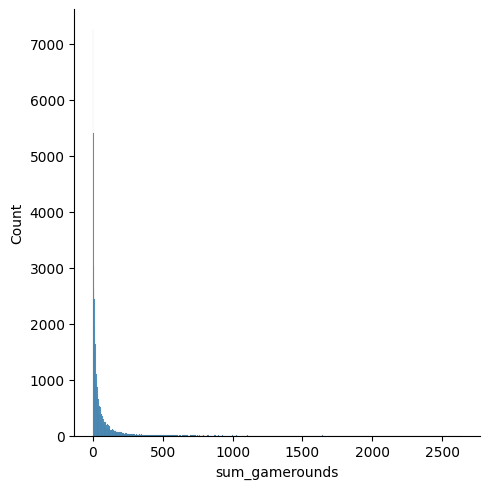

In [21]:
sns.displot(b)

plt.show()

Из гистограммы видно, что распределение не является нормальным, для оценки количественных изменений будем использовать критерий Манна_Уитни.

In [25]:
my_stats3=scipy.stats.mannwhitneyu(x=a, y=b)
my_stats3

MannwhitneyuResult(statistic=1024331250.5, pvalue=0.05020880772044255)

Из статистического анализа по критерию Манна-Уитни можем сделать вывод,что значимых различий в двух группах нет. Порекомендуем проверить алгоритм по сплитованию групп(так есть разница в количественном соотношении между группами), так же стоит уточнить нужно ли включать в группы неактивных пользователей(проведено 0 игр), и на данном этапе не стоит вносить изменения
из тестового варианта.